**Libraries Used**

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Loading the DataSet


In [17]:
ev_sales = pd.read_csv("/content/EV_Sales_Cleaned_Upto_2025.csv")#sales of the EV Vehicle from the year 2017 - 2025(Present)
ev_sales.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


Columns in the DataSet


In [20]:
print("Coloumns in the dataset:",ev_sales.columns)#Columns in the data set

Coloumns in the dataset: Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')


Yearly Sales of each category of the vechile

In [35]:
column_list = ['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL']
yearly_sales_full = ev_sales[column_list].copy()
yearly_sales_full['YEAR'] = pd.to_datetime(yearly_sales_full['YEAR'])
yearly_sales_full['YEAR_ONLY'] = yearly_sales_full['YEAR'].dt.year
yearly_sales_summary = yearly_sales_full.groupby('YEAR_ONLY')[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].sum().reset_index()
yearly_sales_summary # no.of vehicles sold year wise in a category

,YEAR_ONLY,2 W,3 W,4 W,BUS,TOTAL
0,2017,1211,69307,1591,14,72123
1,2018,17062,110375,2500,680,130617
2,2019,30389,133489,1749,1093,166720
3,2020,29112,90361,4323,88,123884
4,2021,156182,147180,14142,1180,318684
5,2022,630725,350129,38744,2383,1021981
6,2023,388785,198159,31121,653,618718
7,2024,1150000,690000,106116,6172,1928288
8,2025,501331,315000,47780,3499,867610


Visual Representation of the EV's annualy

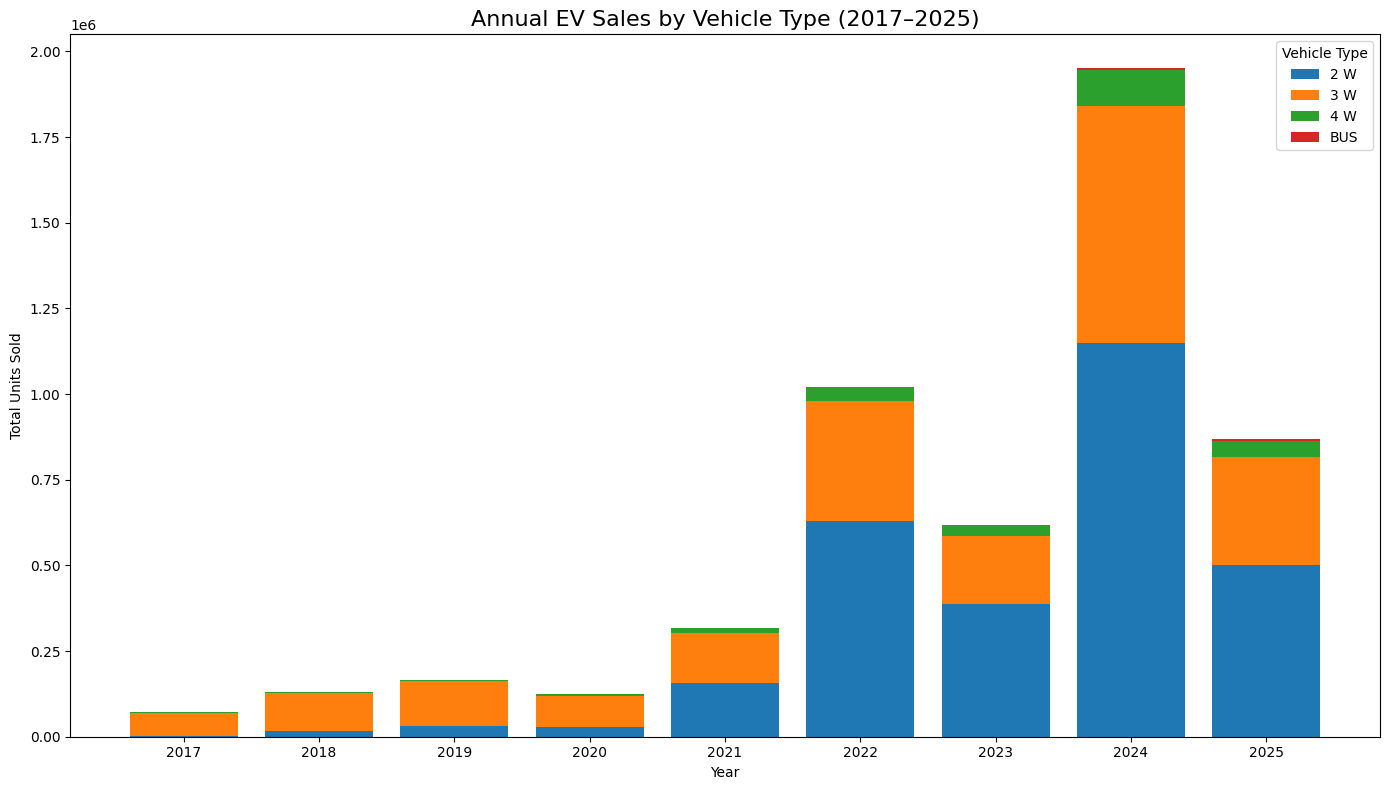

In [28]:
annual_df = ev_sales.copy()
annual_df["YEAR"] = pd.to_datetime(annual_df["YEAR"])
annual_df["Year"] = annual_df["YEAR"].dt.year
annual_summary = annual_df.groupby("Year")[["2 W", "3 W", "4 W", "BUS", "TOTAL"]].sum().reset_index()
plt.figure(figsize=(14, 8))
bottom = None
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
for i, vt in enumerate(["2 W", "3 W", "4 W", "BUS"]):
    if i == 0:
        bottom = None
    else:
        bottom = annual_summary[["2 W", "3 W", "4 W", "BUS"]].iloc[:, :i].sum(axis=1)
    plt.bar(annual_summary["Year"], annual_summary[vt], bottom=bottom, label=vt, color=colors[i])
plt.title("Annual EV Sales by Vehicle Type (2017–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Units Sold")
plt.legend(title="Vehicle Type")
plt.xticks(annual_summary["Year"])
plt.tight_layout()
plt.show()


Year Over Growth

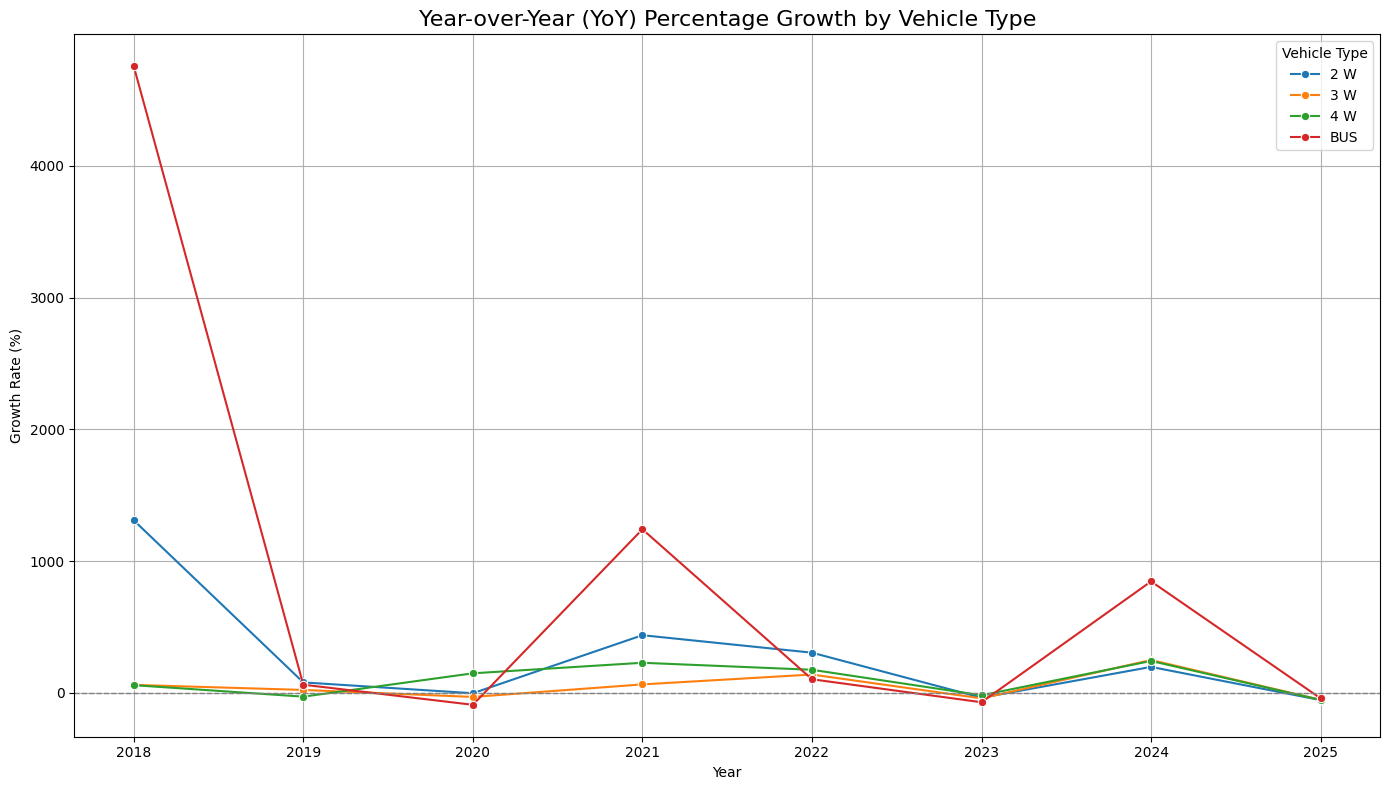

In [33]:
growth_df = annual_summary.copy()
for col in ["2 W", "3 W", "4 W", "BUS", "TOTAL"]:
    growth_df[f"{col}_YoY_Growth"] = growth_df[col].pct_change() * 100
plt.figure(figsize=(14, 8))
for col, color in zip(["2 W", "3 W", "4 W", "BUS"], ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]):
    sns.lineplot(x="Year", y=f"{col}_YoY_Growth", data=growth_df, label=col, marker="o", color=color)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Year-over-Year (YoY) Percentage Growth by Vehicle Type", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.tight_layout()
plt.show()


Market share of the EV's Year wise

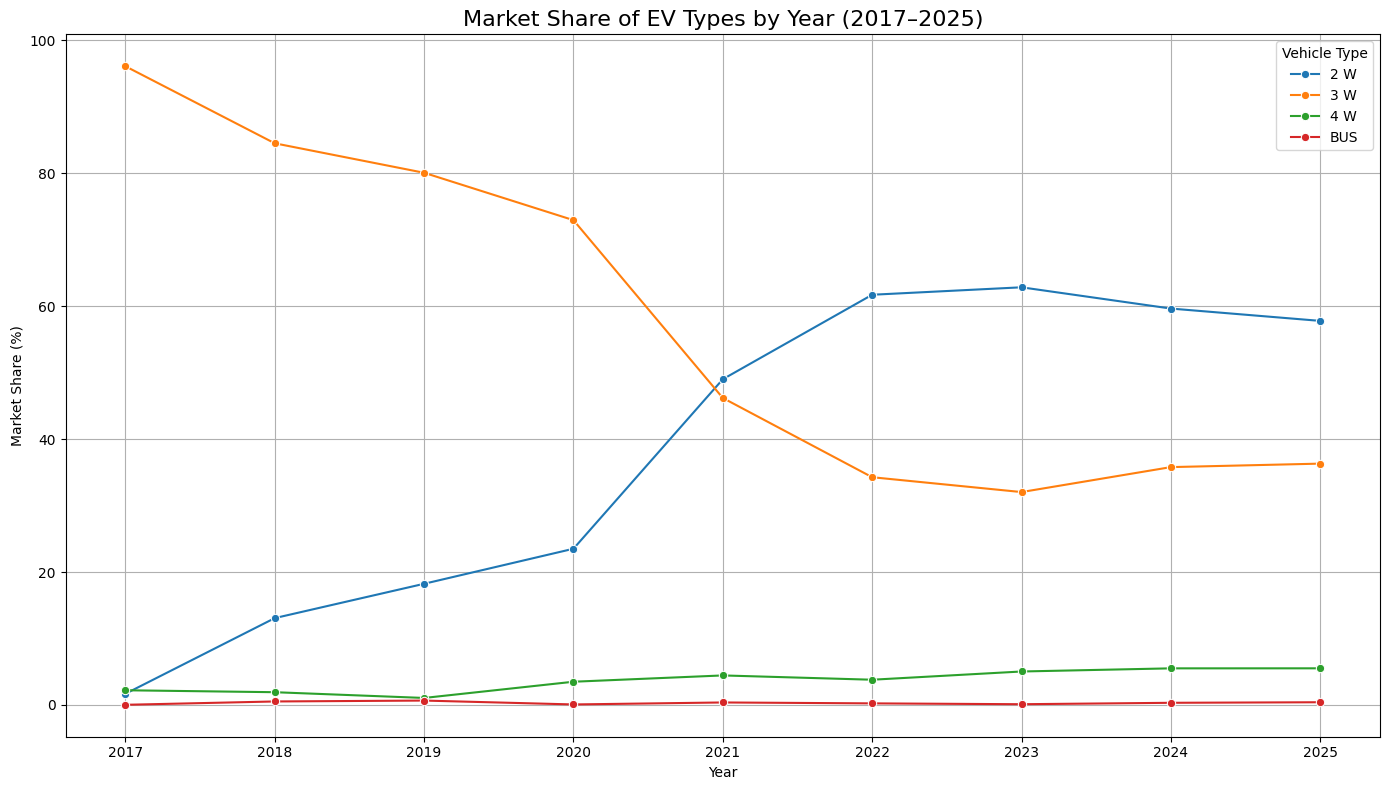

In [34]:
market_share_df = annual_summary.copy()
vehicle_types = ["2 W", "3 W", "4 W", "BUS"]
for vt in vehicle_types:
    market_share_df[f"{vt}_Share"] = (market_share_df[vt] / market_share_df["TOTAL"]) * 100
plt.figure(figsize=(14, 8))
for vt, color in zip(vehicle_types, ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]):
    sns.lineplot(x="Year", y=f"{vt}_Share", data=market_share_df, label=vt, marker="o", color=color)
plt.title("Market Share of EV Types by Year (2017–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.tight_layout()
plt.show()


Final selection of the vehcile category


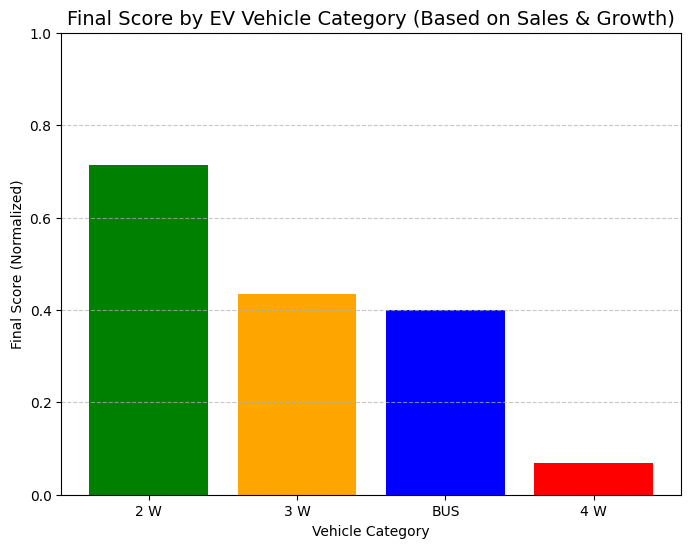

In [39]:
vehicle_types = ['2 W', '3 W', '4 W', 'BUS']
summary_stats = pd.DataFrame(index=vehicle_types)
summary_stats['Total_Sales'] = yearly_sales_summary[vehicle_types].sum()
summary_stats['Average_Annual_Growth'] = growth_rates[[f'{vt}_Growth' for vt in vehicle_types]].mean().values
normalized_stats = pd.DataFrame(scaler.fit_transform(summary_stats),
                                index=summary_stats.index,
                                columns=summary_stats.columns)
normalized_stats['Final_Score'] = 0.6 * normalized_stats['Total_Sales'] + 0.4 * normalized_stats['Average_Annual_Growth']

final_recommendation = normalized_stats.sort_values('Final_Score', ascending=False)
final_recommendation[['Final_Score']], final_recommendation.index[0]
plt.figure(figsize=(8, 6))
bars = plt.bar(final_recommendation.index, final_recommendation['Final_Score'], color=['green', 'orange', 'blue', 'red'])
plt.title('Final Score by EV Vehicle Category (Based on Sales & Growth)', fontsize=14)
plt.xlabel('Vehicle Category')
plt.ylabel('Final Score (Normalized)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
#This clearly supports focusing on electric 2-wheelers for manufacturing.